In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [2]:
# Read Data
path = "pop1.csv"

df = pd.read_csv(path)
df.head()

,id,sex,height
0,5696379,FEMALE,182
1,3019088,MALE,168
2,2038883,MALE,172
3,1920587,FEMALE,154
4,6006813,MALE,174


# Soal 1A

Berdasarkan Height

Carilah nilai mean, varians, dan simpangan bakunya. (5 poin)

In [3]:
# Mean
mean_height = df['height'].mean()
# Varians
var_height = np.var(df['height'])
# Simpangan Baku
std_height = np.std(df['height'], ddof=1)


print('Mean : ', mean_height)
print('Varians : ', var_height)
print('Simpangan Baku :', std_height)

Mean :  170.035
Varians :  126.15761500000002
Simpangan Baku : 11.232046856595902


# Soal 1B

Berdasarkan Height

Carilah Q1, Q2, dan Q3 (kalkulasi interpolasi dengan “midpoint” atau nilai tengah). (5 poin)


In [7]:
# Menghitung Q1, Q2, dan Q3 berdasarkan height
q1 = np.percentile(df['height'], 25, method='midpoint')
q2 = np.percentile(df['height'], 50, method='midpoint')
q3 = np.percentile(df['height'], 75, method='midpoint')

print('Nilai Q1 :', q1)
print('Nilai Q2 :', q2)
print('Nilai Q3 :', q3)

Nilai Q1 : 162.0
Nilai Q2 : 170.0
Nilai Q3 : 178.0


# Soal 1C

Berdasarkan Height

Apakah terdapat outlier? Jika ada, sebutkan jumlahnya! (5 poin)

In [9]:
df.query("height").describe()

,id,height
count,1.000000e+05,100000.00000
mean,5.511697e+06,176.09673
std,2.649482e+06,9.74519
min,1.089679e+06,143.00000
25%,3.405611e+06,170.00000
50%,5.794757e+06,176.00000
75%,7.270055e+06,185.00000
max,9.900372e+06,196.00000


In [22]:
# Menghitung Q1, Q2, dan Q3 dari kolom height
q1 = np.percentile(df['height'], 25, method='midpoint')
q3 = np.percentile(df['height'], 75, method='midpoint')

# Menghitung IQR
iqr = q3 - q1

# Menghitung batas bawah dan batas atas
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print('lower_bound : ', lower_bound)
print('upper_bound : ', upper_bound)

# Mencari outlier dari kolom height
outliers = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]
num_outliers = len(outliers)

# Menampilkan outlier
print('Jumlah Outliers :', num_outliers)


lower_bound :  138.0
upper_bound :  202.0
Jumlah Outliers : 304


# Soal 2A 

Berdasarkan data, buatlah,

Boxplot dari “height” (jenis interpolasi bebas, dapat menggunakan linier atau nilai tengah).
(10 poin)



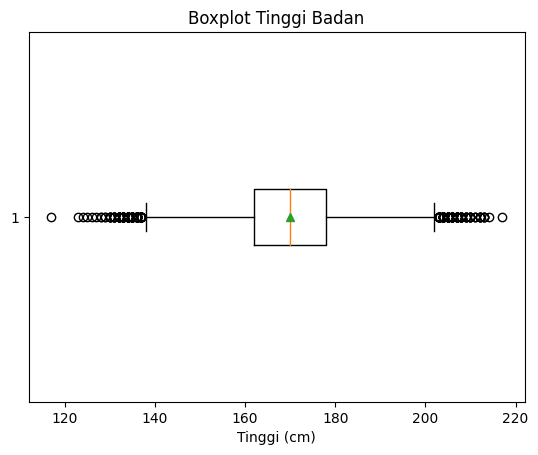

In [26]:
# Membuat boxplot dari kolom height
plt.boxplot(df['height'], vert=False, showmeans=True)

# Memberi judul pada boxplot
plt.title('Boxplot Tinggi Badan')

# Memberi label pada sumbu x
plt.xlabel('Tinggi (cm)')

# Menampilkan boxplot
plt.show()

# Soal 2B

Berdasarkan data, buatlah,

Histogram dari “height” dengan jumlah kelompok (bins) adalah 100. (10 poin)

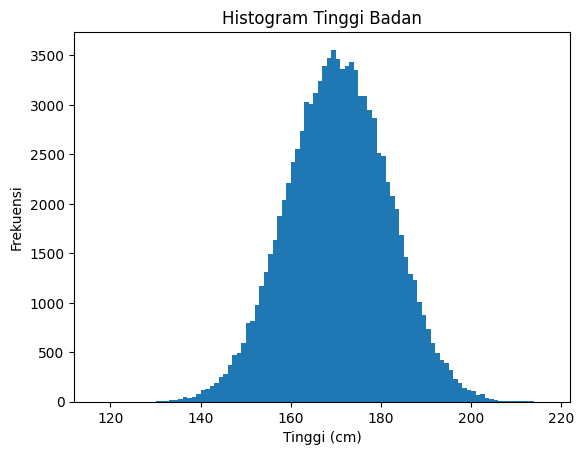

In [29]:
# Membuat histogram dari kolom height
plt.hist(df['height'], bins=100)

plt.title('Histogram Tinggi Badan')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Frekuensi')

# Tampil histogram
plt.show()

# Soal 3A

Berdasarkan nilai mean dan simpangan baku pada soal nomor 1, tentukan

Berapa nilai z (z-score) untuk orang dengan tinggi hingga 175cm? (10 poin)

In [35]:
# Hitung nilai mean dari kolom height
mean_height = np.mean(df['height'])
print('Mean : ', round(mean_height, 3)) 

# Hitung nilai standar deviasi / Simpangan Baku dari kolom height
stddev_height = np.std(df['height'])
print('Simpangan Baku : ', round(stddev_height, 3)) 

# Hitung nilai z-score untuk tinggi 175 cm
z_score = (175 - mean_height) / stddev_height

# Show nilai z-score
print("Nilai z-score :", round(z_score, 2))

Mean :  170.035
Simpangan Baku :  11.232
Nilai z-score : 0.44


# Soal 3B

Berdasarkan nilai mean dan simpangan baku pada soal nomor 1, tentukan

Berapa peluang orang dengan tinggi lebih dari 175cm? (10 poin)

In [37]:
# Mean
mean_height = np.mean(df['height'])
print('Mean : ', round(mean_height, 3)) 

# Simpangan Baku
stddev_height = np.std(df['height'])
print('Simpangan Baku : ', round(stddev_height, 3)) 

# z-score untuk tinggi 175 cm
z_score = (175 - mean_height) / stddev_height
print("Nilai z-score : ", round(z_score, 2))

# Hitung peluang orang dengan tinggi lebih dari 175 cm
prob = 1 - norm.cdf(z_score)

# Menampilkan peluang
print("Peluang : ", prob)

Mean :  170.035
Simpangan Baku :  11.232
Nilai z-score :  0.44
Peluang :  0.3292297815214774


# Soal 4A

Peluang dari “MALE” dan “FEMALE”. (5 poin)

In [40]:
# Jumlah data "MALE"
num_male = df['sex'].value_counts()['MALE']

# Jumlah data "FEMALE"
num_female = df['sex'].value_counts()['FEMALE']

# Total data
total_data = df['sex'].count()

# Peluang "MALE"
prob_male = num_male / total_data

# Peluang "FEMALE"
prob_female = num_female / total_data

print("Peluang MALE: ", prob_male)
print("Peluang FEMALE: ", prob_female)

Peluang MALE:  0.51112
Peluang FEMALE:  0.48888


# Soal 4B

Jika kita memilih orang secara acak sebanyak 10 kali, berapa peluang terpilihnya 3 laki-laki?
(20 poin)


In [50]:
from scipy.special import comb

n = 10
k = 3
p = 0.51112
probabilities = [comb(n, k) * p**k * (1-p)**(n-k)] # Rumus combinasi K * Probabilitas Binomial
percentage = probabilities[0] * 100

print('Probabilitas : ', probabilities)
print('Probabilitas : {:.2f}%'.format(percentage))


Probabilitas :  [0.10694630059966359]
Probabilitas : 10.69%


# Soal 4C

Visualisasikan dengan menggunakan diagram batang, distribusi terpilihnya laki-laki mulai dari
0 hingga 10. (20 poin)


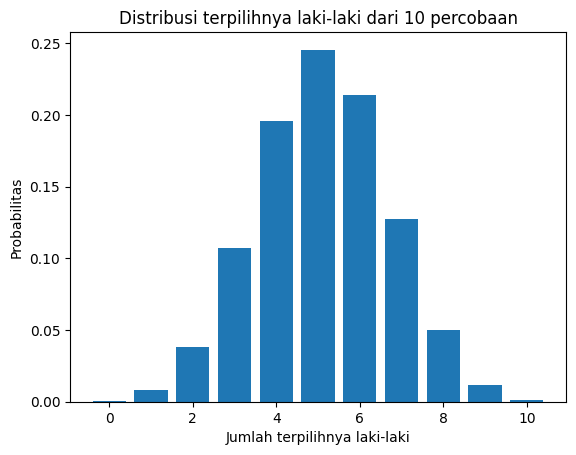

In [44]:
from scipy.special import comb

n = 10
p = 0.51112
k_values = np.arange(n+1)
probabilities = [comb(n, k) * p**k * (1-p)**(n-k) for k in k_values] # Rumus combinasi K * Probabilitas Binomial

fig, ax = plt.subplots()
ax.bar(k_values, probabilities)
ax.set_xlabel('Jumlah terpilihnya laki-laki')
ax.set_ylabel('Probabilitas')
ax.set_title('Distribusi terpilihnya laki-laki dari 10 percobaan')
plt.show()